# Limit theorems and Convergence

#### Null Space Research

*Presenting the mathematical proofs behind essential concepts and their associated implementations in code. Presented here are **CLT, WLLN, SLLN and Sums of Uniform random variable convergence**, along with some necessary derivations, theorems and proofs that ground the code implementations in solid mathematical foundations.*

## Markov's Inequality

Before delving into the proof and codes of the limit theorems, fundamental building blocks in the forms of **Markov's inequality** and **Chebyshev's inequality** propositions need to be stated. These propositions help us in finding out the bounds of probabilities in cases where we only know the mean and variance of a probability distribution. First we will look at proving Markov's inequality. Suppose that $X$ is a random variable taking on non-negative values, then for any $a>0$ we would have:

$$P(X\geq a) \leq \dfrac{E[X]}{a}$$

Now we essentially represent an indicator random variable by defining it over $a>0$ as follows:

$$I = \begin{cases}
1 & \text{if} X\geq a\\
0 & \text{otherwise}
\end{cases}$$

We can say that for $X\geq0$ we can have the indicator variable taking on values as:

$$I \leq \dfrac{X}{a}$$

Taking expectations on both sides we get:

$$E[I] \leq \dfrac{E[X]}{a}$$

While computing $E[I]$ we can put it the form of a weighted average with probabilities as the weights:

$$E[I] = 1\times P(X\geq A) + 0\times P(X < A) = P(X\geq A)$$

Now because we have essentially shown as $E[I] = P(X\geq A)$ we have justified the Markov's inequality:

$$P(X\geq A) \leq \dfrac{E[X]}{a}$$

## Chebyshev's inequality

This proposition can be stated as follows - If $X$ is a random variable with finite mean $\mu$ and variance $\sigma^2$ then for any value of $k>0$ we have the following result. Note that the event in the probability shown below essentially represents **tail probabilities of X** and this inequality gives us a bound on these tail probabilities.

$$P(|X-\mu| \geq k) \leq \dfrac{\sigma^2}{k^2}$$

Now we know that $(X-\mu)^2$ is essentially a non-negative random variable. So basically if we set $a = k^2$ then we can write the **Markov's inequality** as follows:

$$P((X-\mu)^2 \geq a^2) \leq \dfrac{E[(X-\mu)^2]}{a^2}$$

We also know that $(X-\mu)^2 \geq k^2$ and $|X-\mu| \geq k$ are equivalent conditions. Therefore we can rewrite the above eqaution as:

$$P(|X-\mu| \geq k) \leq \dfrac{\sigma^2}{k^2}$$

## A proposition linked with Chebyshev's inequality

This important proposition states that - random variables with zero variance are associated with a constant probability of $1$. Basically if $Var(X) = 0$ then:

$$P(X = E[X]) = 1$$

Now for a zero variance random variable we can state the **Chebyshev's inequality**, for any $n\geq 1$ as follows:

$$P\left(|X-\mu| > \dfrac{1}{n}\right) \leq 0$$

Since we know that probability cannot be negative this inequality can be resolved to an equation:

$$P\left(|X-\mu| > \dfrac{1}{n}\right) = 0$$

Now we can let $n\rightarrow \infty$ and use the continuity property of probability to get:

$$0 = \lim_{n\rightarrow \infty}P\left(|X-\mu| > \dfrac{1}{n}\right) = P\left(\lim_{n\rightarrow \infty}\left(|X-\mu| > \dfrac{1}{n}\right)\right) = P(X\neq \mu)$$

In the right hand side, if we resolve the modulus operator within the limits, we will essentially get events which can be combined in some form:

$$(X-\mu) > 0 \rightarrow X > \mu$$
$$(-X+\mu) > 0 \rightarrow X < \mu$$
$$X \neq \mu$$

## The weak law of large numbers

Let $X_1,X_2,\cdots, X_n$ be a sequence of independently and identically distributed random variables, each having finite mean $E[X_i] = \mu$. Then we that for any $\epsilon > 0$ the tail probabilities of the distribution of the sample mean goes to $0$ and the probability mass centers around the population mean.

$$P\left(\dfrac{X_1+X_2+\cdots+X_n}{n} - \mu| > \epsilon\right) \overset{n\rightarrow \infty}{\to} 0$$

Before moving on with the proof, we assume that the random variables have finite variance $\sigma^2$. We can now calculate the mean and variance associated with the sample mean statistic. 

$$E\left(\dfrac{X_1+X_2+\cdots+X_n}{n}\right) = \mu$$
$$Var\left(\dfrac{X_1+X_2+\cdots+X_n}{n}\right) = \dfrac{\sigma^2}{n}$$

From **Chebyshev's inequality** we can state that:

$$P\left(|\dfrac{X_1+X_2+\cdots+X_n}{n} - \mu| \geq \epsilon\right) \leq \dfrac{\sigma^2}{n\epsilon} = 0, \ as \ n\rightarrow \infty$$ 

&nbsp;


In [43]:
# Our first step is to set an array of different sample sizes
# next step is to set the number of repeated experiments to obtain a
# distribution for the sample mean

# EXPERIMENT - Tossing a fair coin

import random, pylab, seaborn
seaborn.set()

def SD(X):
    mean = sum(X)/len(X)
    tot = 0.0
    for x in X:
        tot += (x-mean)**2
    return (tot/len(X))**0.5

def one_trial(num_flips):
    heads = 0.0
    for i in range(num_flips):
        if random.choice([1,0]) == 1:
            heads += 1
    return heads/num_flips

def simulate_flipping(num_flips, num_trials):
    heads = []
    for i in range(num_trials):
        fraction = one_trial(num_flips)
        heads.append(fraction)
    mean_value = sum(heads)/len(heads)
    sd_value = SD(heads)
    return (heads, mean_value, sd_value)

def label_plot(num_flips, num_trials, mean, sd):
    pylab.title(str(num_trials) + 'trials of' + str(num_flips) + 'flips in each trial')
    pylab.xlabel('heads fraction')
    pylab.ylabel('number of trials')
    xmin, xmax = pylab.xlim()
    ymin, ymax = pylab.ylim()
    pylab.text(xmin + (xmax-xmin)*0.02, (ymax-ymin)/2,
               'mean='+str(round(mean,4)) +
               '\nSD='+str(round(sd,4)), size='x-large')
    
def form_plots(num_flips_1, num_flips_2, num_flips_3, num_flips_4, num_trials):
    value1, mean1, sd1 = simulate_flipping(num_flips_1, num_trials)
    pylab.hist(value1, bins = 20)
    xmin, xmax = pylab.xlim()
    ymin, ymax = pylab.ylim()
    label_plot(num_flips_1, num_trials, mean1, sd1)
    pylab.figure()
    value2, mean2, sd2 = simulate_flipping(num_flips_2, num_trials)
    pylab.hist(value2, bins = 20)
    pylab.xlim(xmin, xmax)
    label_plot(num_flips_2, num_trials, mean2, sd2)
    pylab.figure()
    value3, mean3, sd3 = simulate_flipping(num_flips_3, num_trials)
    pylab.hist(value3, bins = 20)
    pylab.xlim(xmin, xmax)
    label_plot(num_flips_3, num_trials, mean3, sd3)
    pylab.figure()
    value4, mean4, sd4 = simulate_flipping(num_flips_4, num_trials)
    pylab.hist(value4, bins = 20)
    pylab.xlim(xmin, xmax)
    label_plot(num_flips_4, num_trials, mean4, sd4)

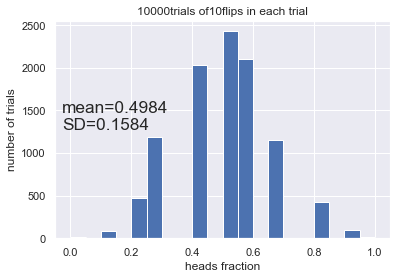

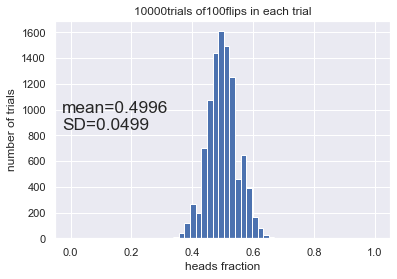

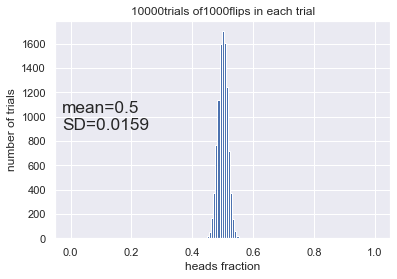

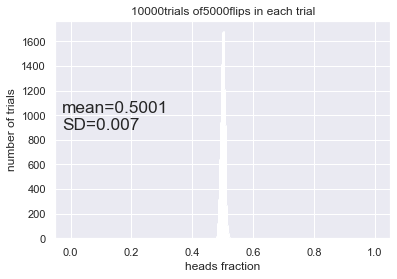

In [29]:
form_plots(10,100,1000,5000,10000)

*We can state that after conducting repeated experiments while sampling identical and independently distributed random variables with finite mean and variance, we can obtain a distribution of the sample averages of each repeated experiment. Then the WLLN states that the tails of this distribution tend to zero as the sample size increases. The probability mass of the distribution falls entirely on the true population mean. The sample average is therefore said to converge in probability to the population mean. This is the essence of the WLLN.*

## Central Limit Theorem

Statement of the **CLT** is as follows - Let $X_1,X_2,\cdots,X_n$ be a sequence of independently and identically distributed random variables with finite mean $\mu$ and finite variance $\sigma^2$.Then, the distribution of the sum of these random variables tends to the **standard normal distribution** given by:

$$\dfrac{X_1+X_2+\cdots+X_n - n\mu}{\sigma\sqrt{n}}$$

The distribution of the above statistic tends to standard normal as $n\rightarrow \infty$. We can say that for $-\infty < a < \infty$:

$$P\left(\dfrac{X_1+X_2+\cdots+X_n-n\mu}{\sigma\sqrt{n}} \geq a\right) \overset{n\rightarrow \infty}{\to} \dfrac{1}{\sqrt{2\pi}}\int_{-\infty}^{a}\exp^{-x^2/2}dx$$

Now before delving into the proof of the **CLT** we have a look at a rather important lemma stated as follows - Let $Z_1, Z_2,\cdots$ be a sequence of random variables having distribution functions given by $F_{Z_n}$ and moment generating functions $M_{Z_n}$. Further we let $Z$ be a random variable with distribution function $F_Z$ and moment generating function $M_Z$. We can say that if $M_{Z_n}(t)$ then for all $t$ we have $F_{Z_n}(t) \rightarrow F_Z(t)$ for all those $t$ for which $F_Z(t)$ is continuous.

As per this lemma we can note that if $Z$ is a standard normal variable then $M_Z(t) = e^{t^2/2}$ then it follows that if $M_{Z_n}(t) \overset{n\rightarrow \infty}{\to} e^{t^2/2}$ then we can say that $F_{Z_n}(t) \overset{n\rightarrow \infty}{\to} \Phi(t)$.

### proving the theorem

We first assume that the mean and variance of random variable $X$ is given as $\mu = 0$ and $\sigma^2 = 1$. The moment generating function of independent and identically distributed random variable $X_i/\sqrt{n}$ is given by:

$$E\left(\exp\dfrac{tX_i}{\sqrt{n}}\right) = M\left(\dfrac{t}{\sqrt{n}}\right)$$

Now the moment generating function of $\sum_{i=1}^{n}X_i/n$ would be given by:

$$\left(M\left(\dfrac{t}{\sqrt{n}}\right)\right)^n$$

This is due to the logic that summed power of exponents resolves to a multiplication:

$$e^{x_1 + x_2} = e^{x_1}\times e^{x_2}$$

And since all the sequence of $n$ random variables are independent and identical we can essentially raise all those multiplication terms to the power of $n$.

Now we let $L(t) = \log M(t) = \log E[\exp(tX_i)]$. We can note that:

$$L(0) = \log M(0) = \log E[1] = 0$$
$$L'(0) = \dfrac{M'(0)}{M(0)} = \mu = 0$$
$$L''(0) = \dfrac{M(0)M''(0) - [M'(0)]^2}{[M(0)]^2} = E[X^2] = 1$$

With the above results in mind, we basically need to prove that $[M(t/\sqrt{n})]^n \overset{n\rightarrow \infty}{\to}e^{t^2/2}$ or equivalently, we can show that $nL(t/\sqrt{n}) \overset{n\rightarrow \infty}{\to} t^2/2$. Now to show this we note that:

$$\lim_{n\rightarrow \infty}\dfrac{L(t/\sqrt{n})}{n^{-1}} = \lim_{n\rightarrow \infty}\dfrac{-L'(t/\sqrt{n})n^{-3/2}t}{-2n^{-2}}, \ L'hospitals \ rule \ used$$

$$=\lim_{n\rightarrow \infty}\dfrac{L'(t/\sqrt{n})t}{2n^{}-1/2}$$

$$=\lim_{n\rightarrow \infty}\dfrac{-L''(t/\sqrt{n})n^{-3/2}t^2}{-2n^{-3/2}}, \ again \ using \ L'hospitals$$

$$ = \lim_{n\rightarrow \infty}L''\left(\dfrac{t}{\sqrt{n}}\right)\dfrac{t^2}{2} = t^2/2, \ since L''(0) = 1$$

In [42]:
# conduct repeated trials of an experiement with varying sample sizes,
# set up an experiment, calculate sample mean, standardize it
# finally show that the standardized statistic follows a standard normal distribution

def SD(X):
    mean = sum(X)/len(X)
    tot = 0.0
    for x in X:
        tot += (x-mean)**2
    return (tot/len(X))**0.5

def one_trial(num_flips):
    heads = 0.0
    for i in range(num_flips):
        if random.choice([1,0]) == 1:
            heads += 1
    z_heads = (heads-(float(num_flips)*0.5))/(((float(num_flips))**0.5)*0.25)
    return z_heads

def simulate_flipping(num_flips, num_trials):
    heads = []
    for i in range(num_trials):
        fraction = one_trial(num_flips)
        heads.append(fraction)
    mean_value = sum(heads)/len(heads)
    sd_value = SD(heads)
    return (heads, mean_value, sd_value)

def label_plot(num_flips, num_trials, mean, sd):
    pylab.title(str(num_trials) + 'trials of' + str(num_flips) + 'flips in each trial')
    pylab.xlabel('heads fraction')
    pylab.ylabel('number of trials')
    xmin, xmax = pylab.xlim()
    ymin, ymax = pylab.ylim()
    
def form_plots(num_flips_1, num_flips_2, num_flips_3, num_flips_4, num_trials):
    value1, mean1, sd1 = simulate_flipping(num_flips_1, num_trials)
    pylab.hist(value1, bins = 20)
    xmin, xmax = pylab.xlim()
    ymin, ymax = pylab.ylim()
    label_plot(num_flips_1, num_trials, mean1, sd1)
    pylab.figure()
    value2, mean2, sd2 = simulate_flipping(num_flips_2, num_trials)
    pylab.hist(value2, bins = 20)
    pylab.xlim(xmin, xmax)
    label_plot(num_flips_2, num_trials, mean2, sd2)
    pylab.figure()
    value3, mean3, sd3 = simulate_flipping(num_flips_3, num_trials)
    pylab.hist(value3, bins = 20)
    pylab.xlim(xmin, xmax)
    label_plot(num_flips_3, num_trials, mean3, sd3)
    pylab.figure()
    value4, mean4, sd4 = simulate_flipping(num_flips_4, num_trials)
    pylab.hist(value4, bins = 20)
    pylab.xlim(xmin, xmax)
    label_plot(num_flips_4, num_trials, mean4, sd4)

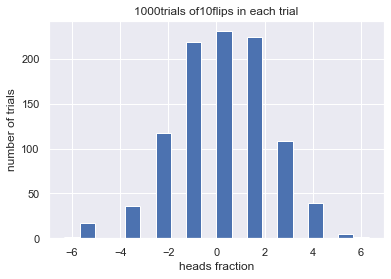

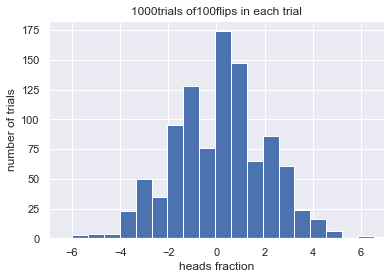

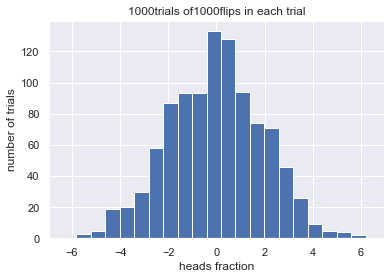

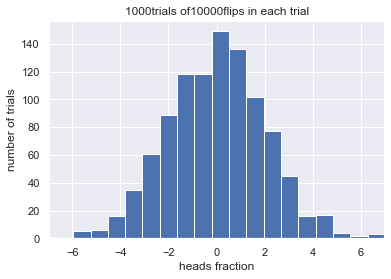

In [43]:
form_plots(10,100,1000,10000,1000)

*We can clearly see that as the sample size is increasing, the distribution is increasingly resembling a standard normal distribution with mean 0 and variance 1. This is the central limit theorem in essence - If we conduct an experiment repeatedly, each time with n iid random variables, then the standardized statistic of the sample mean of these random variables follows a standard normal distribution as the sample size increases. The distribution of this sequence of random variables hence, converges in distribution to the standard normal.*

## The strong law of large numbers

We would state this theorem as follows - Let $X_1, X_2,\cdots,X_n$ be a sequence of independently and identically distributed random variables each having a finite mean $E[X_i] = \mu$, then we say that with probability equal to $1$ that:

$$\dfrac{X_1+X_2+\cdots+X_n}{n} \overset{n\rightarrow \infty}{\to}\mu$$

To demonstrate, let us assume that a sequence of independent trials of some experiment is performed. Further we let $E$ be a fixed event of the experiment that $P(E)$ is the corresponding probability of the occurrence of that event in a particulart trial. Now we define an indicator random variable as:

$$X_i = \begin{cases}
1 & \text{if E occurs in the ith trial}\\
0 & \text{if E does not occur in the ith trial}\end{cases}$$



Then by the Strong law of large numbers we state that with probability $1$ that:

$$\dfrac{X_1+X_2+\cdots+X_n}{n}\rightarrow E[X] = 1\times P(E) + 0\times P(\bar{E}) = P(E)$$

We note that $X_1+X_2+\cdots+X_n$ denotes the number of times the event $E$ occurs in $n$ successive trials of the experiment. This law states that with probability $1$, the limiting proportion of times the event occurs is the true probability of the occurrence of that event, that is $P(E)$. Before delving into the proof, we will assume that the random variables have a finite fourth moment $E[X_i^4] = K <\infty$.

### proof of SLLN

We begin by assuming that the mean of $X_i$ is equal to $0$. We let $S_n = \sum_{i=1}^{n}X_i$. Then we have:

$$E[S_n^4] = E[(X_1+\cdots+X_n)(X_1+\cdots+X_n)(X_1+\cdots+X_n)(X_1+\cdots+X_n)]$$

Upon expanding the right hand side multiplications, we will get terms of the form:

$$X_i^4, \ X_i^3X_j, \ X_i^2X_j^2, \ X_i^2X_jX_k, \ X_iX_jX_kX_l$$

Now because all the $X_i$ are independent and have mean $0$ we have:

$$E[X_i^3X_j] = E[X_i^3]E[X_j] = 0$$
$$E[X_i^2X_jX_k] = E[X_i^2]E[X_j]E[X_k] = 0$$
$$E[X_iX_jX_kX_l] = 0$$

Further we note that there will be ${4\choose 2} = 6$ terms that will be of the form $X_i^2X_j^2$ since we are essentially selecting pairs of $2$ out of $4$ elements. Now, expanding the product, resolving the zero terms and taking expectations we get:

$$E[S_n^4] = {n\choose 1}E[X_i^4] + 6{n\choose 2}E[X_i^2X_j^2]$$

$$ = nK + 3n(n-1)E[X_i^2]E[X_j^2]$$

Now we will make use of the condition that these variables are independent and write:

$$0 \leq Var(X_i^2) = E[X_i^4] - (E[X_i^2])^2$$
$$(E[X_i^2]) \leq E[X_i^4] = K$$

From this we will obtain:

$$E[S_n^4] \leq nK + 3n(n-1)K$$

Dividing throughout by $n^4$ we would get:

$$E\left(\dfrac{S_n^4}{n^4}\right) \leq \dfrac{K}{n^3} + \dfrac{3K}{n^2}$$

Note that we have ignored the expansion term $3K/n^3$ since the above would be a bigger set and hence gives us a upper bound. Finally we would take an infinite sum on both sides to get:

$$E\left(\sum_{n=1}^{\infty}\dfrac{S_n^4}{n^4}\right) = \sum_{n=1}^{\infty}E\left(\dfrac{S_n^4}{n^4}\right) < \infty$$

Note that we can write this because of the fact that the right hand side sequence would converge to a finite sum over an infinite series. We note now that if there is a positive measure of probability for which an infinite sum is infinite, then its expected value would also be infinite. But this is not the case here since our expected value is finite. Therefore we can say with probability $1$ that:

$$\sum_{n=1}^{\infty}\dfrac{S_n^4}{n^4} < \infty$$

We also know that the convergence of an infinite series goes to $0$ and hence we can say with probability $1$ that:

$$\lim_{n\rightarrow \infty}\dfrac{S_n^4}{n^4} = 0$$

Now since the fourth power of this expression goes to $0$ then we can also conclude with probability $1$ that:

$$\dfrac{S_n}{n} \overset{n\rightarrow \infty}{\to} 0$$

Finally, in this case we took our mean to be $0$ but in a more general case we can make the statement that with probability $1$:

$$\lim_{n\rightarrow \infty}\sum_{i=1}^{n}\dfrac{X_i-\mu}{n} = 0$$
$$\lim_{n\rightarrow \infty}\sum_{i=1}^{n}\dfrac{X_i}{n} = \mu$$

In [53]:
def coinFlip(number_of_flips):
    heads = 0.0
    for i in range(number_of_flips):
        if random.choice([1,0]) == 1:
            heads += 1
    return heads/number_of_flips

print('sample1: ',coinFlip(10))
print('sample1: ',coinFlip(100))
print('sample1: ',coinFlip(1000))
print('sample1: ',coinFlip(10000))
print('sample1: ',coinFlip(100000))
print('sample1: ',coinFlip(1000000))

sample1:  0.3
sample1:  0.5
sample1:  0.501
sample1:  0.5016
sample1:  0.49853
sample1:  0.500356


*We can see that in the case of SLLN that a single sequence of outcomes converges almost surely to the true parameter value as we increase the sample size. The sample average of one realisation of the experiment converges to the true probability as sample size is increased.*

## Convergence of sums of uniform random variables

Now we will look at a case wherein we take independent and identically distributed random variables belonging to the **uniform distribution** characterised as:

$$X_i \sim unif(0,1)$$

Further, the general formula for mean and variance is given by:

$$\mu = \dfrac{a+b}{2}, \ \sigma = \dfrac{(b-a)^2}{12}$$

The mean for this distribution is $1/2$ and variance is $1/12$. The general form for this probability distribution function is given by:

$$f_{X_i}(x) = \begin{cases} \dfrac{1}{b-a}, \ x\in (a,b)\\ 0, \ \ \ \ \ \ \ \ \ x \in (a,b)^c \end{cases}$$

Now what we will do is essentially this: Take varying number of random samples from this distributions, compute the **standardized Z statistic** (which implies the distribution of the sum of the random variables) for each sample size and check the distribution of this sum. The general formulation for this is:

$$Z_n = \dfrac{(X_1+X_2+\cdots+X_n) - n\mu}{\sqrt{n}\sigma}$$

If we sample once we get:

$$Z_1 = \dfrac{X_1 - 1/2}{\sqrt{1/12}}$$

Now if we sample twice we get:

$$Z_2 = \dfrac{(X_1 + X_2) - 2/2}{\sqrt{2/12}}$$

Similarly if we sample say $50$ times we would get:

$$Z_{50} = \dfrac{(X_1+X_2+\cdots+X_{50}) - 50/2}{\sqrt{50/12}}$$

We would then observe that the PDF of this sum of a large number of uniform random variables would converge to the **Standard Normal Distribution**.

***The idea is to conduct repeated experiments with different sample sizes. For a given sample size, for each experiment we compute the Z-stat (corresponding to the sum of the random samples). After conducting many experiments we would have a distribution of these Z-values. This distribution of Z-values (of the sums of uniform random samples) would converge to the standard normal as we increase the sample size.***

In [20]:
import random, seaborn, pylab

def compute_stat(size, num_trials):
    trial_dist = []
    for trial in range(num_trials):
        dist = [random.uniform(0,1) for i in range(size)]
        mean_pop = len(dist)*0.5
        stdev_pop = math.sqrt(len(dist))*0.288675
        z_dist = (sum(dist)-mean_pop)/stdev_pop
        trial_dist.append(z_dist)
    return trial_dist, mean_pop, stdev_pop

def form_plots_2(num_flips_1, num_trials):
    value1, mean1, sd1 = compute_stat(num_flips_1, num_trials)
    pylab.hist(value1, bins = 20)
    xmin, xmax = pylab.xlim()
    ymin, ymax = pylab.ylim()

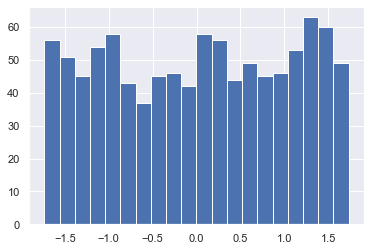

In [44]:
form_plots_2(1, 1000)

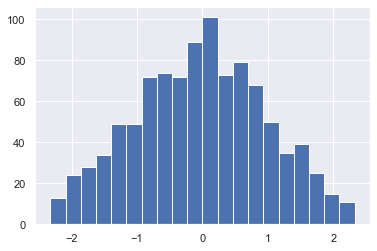

In [45]:
form_plots_2(2, 1000)

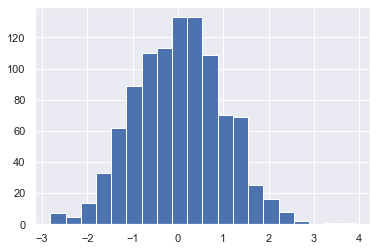

In [46]:
form_plots_2(50, 1000)

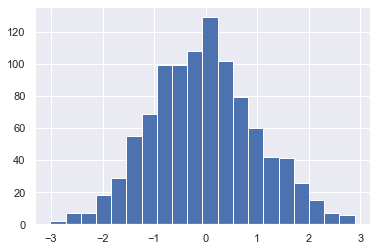

In [47]:
form_plots_2(100, 1000)